# Kaggle Titanic Data Exploration
Exploratory data analysis using the training dataset from [Kaggle's Titanic competition](https://www.kaggle.com/c/titanic)
- Descriptive statistics for categorical and numerical features
- Visualizations
- Feature correlations

<img src="titanic_dd.png">

### Import dependencies and read in data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read dataset as a pandas dataframe
df_train = pd.read_csv('train.csv')

### Initial data inspection

In [5]:
# inspect first 5 rows
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# inspect number of samples and variables
df_train.shape

(891, 12)

In [17]:
# Inspect data types and quantity
# Age, Cabin, Embarked all contain na values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# inspect na values to determine optimal way to handle
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The train dataset's features/variables are as follows:

**Categorical features**

- Categorical: Survived, Sex, and Embarked
- Ordinal: Pclass

**Numerical features**

- Continous: Age, Fare
- Discrete: SibSp, Parch

### Descriptive statistics

In [93]:
# Inspect distribution of categorical features
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"de Mulder, Mr. Theodore",male,347082,G6,S
freq,1,577,7,4,644


In [94]:
# Inspect descriptive statistics for numerical features 
# na values remain in dataset
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visualizations

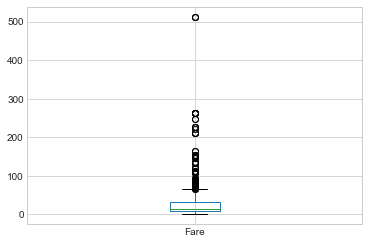

In [73]:
# Boxplot of numerical features - Fare
df_train.boxplot(column='Fare')

In [79]:
# Adjust Fare boxplot to remove the 500 value outlier (likely an error)

# Create copy 
df_adjusted = df_train.copy()

# Drop values based on fare condition
indexNames = df_adjusted[ (df_adjusted['Fare'] > 300) ].index
df_adjusted.drop(indexNames , inplace=True)

# See how many values were dropped
df_adjusted.shape

(888, 12)

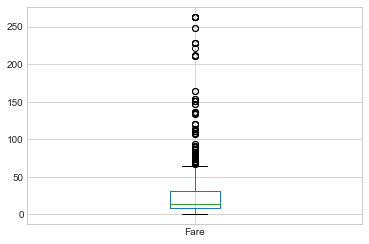

In [95]:
# Boxplot of numerical features - Fare (adjusted)
df_adjusted.boxplot(column='Fare')

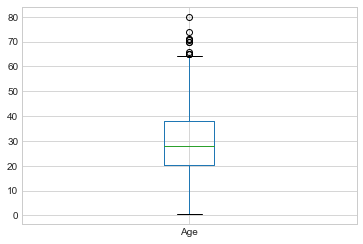

In [74]:
# Boxplot of numerical features - Age
df_train.boxplot(column='Age')

### Feature correlations

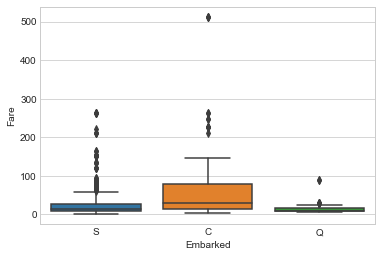

In [90]:
# Examine Fare distribution by port of embarkment
sns.boxplot( x=df_train["Embarked"], y=df_train["Fare"] )

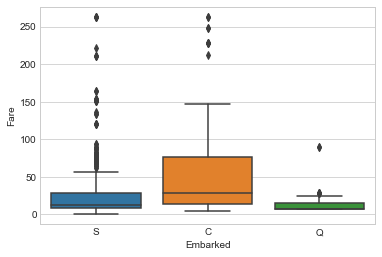

In [109]:
# Examine Fare distribution by port of embarkment (Fare values > 300 removed)
sns.boxplot( x=df_adjusted["Embarked"], y=df_adjusted["Fare"] )

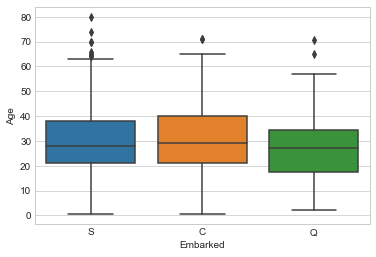

In [91]:
# Examine Fare distribution by port of embarkment  
sns.boxplot( x=df_train["Embarked"], y=df_train["Age"] )

In [44]:
# Examine feature correlation for survival by Pclass
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [45]:
# Examine feature correlation for survival by Sex
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [46]:
# Examine feature correlation for survival by SibSp
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [47]:
# Examine feature correlation for survival by Parch
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


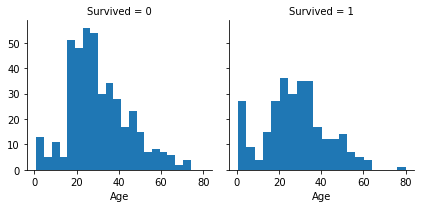

In [50]:
# Examine feature correlation for survival by Age
age = sns.FacetGrid(df_train, col='Survived')
age.map(plt.hist, 'Age', bins=20)

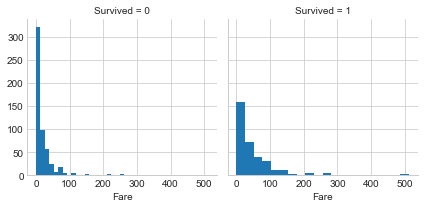

In [101]:
# Examine feature correlation for survival by Fare
fare = sns.FacetGrid(df_train, col='Survived')
fare.map(plt.hist, 'Fare', bins=20)

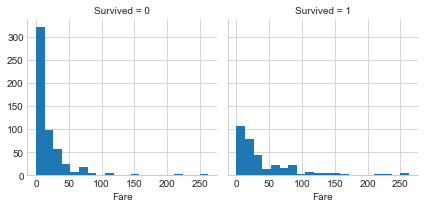

In [102]:
# Examine feature correlation for survival by Fare (Fare values > 300 removed)
fare = sns.FacetGrid(df_adjusted, col='Survived')
fare.map(plt.hist, 'Fare', bins=20)

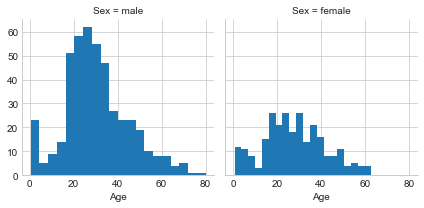

In [100]:
# Examine feature correlation for Sex and Age
fare = sns.FacetGrid(df_train, col='Sex')
fare.map(plt.hist, 'Age', bins=20)

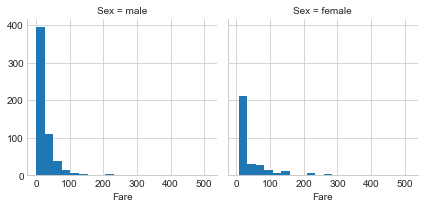

In [106]:
# Examine feature correlation for Sex and Fare 
fare = sns.FacetGrid(df_train, col='Sex')
fare.map(plt.hist, 'Fare', bins=20)

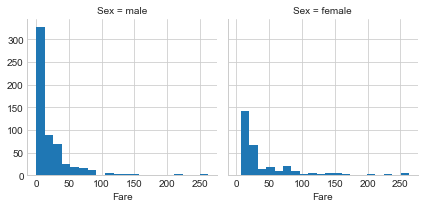

In [108]:
# Examine feature correlation for Sex and Fare (Fare values > 300 removed)
fare = sns.FacetGrid(df_adjusted, col='Sex')
fare.map(plt.hist, 'Fare', bins=20)